In [ ]:
pip install datasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Importo dataset de huggingface
id = "gauss314/arg-equity"
data = load_dataset(id)
data = pd.DataFrame(data['train'][:]).set_index('index')
data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

,ALUA_t0,ALUA_t-1,BBAR_t0,BBAR_t-1,BMA_t0,BMA_t-1,BYMA_t0,BYMA_t-1,CEPU_t0,CEPU_t-1,...,TGSU2_t0,TGSU2_t-1,TRAN_t0,TRAN_t-1,TXAR_t0,TXAR_t-1,VALO_t0,VALO_t-1,YPFD_t0,YPFD_t-1
index,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.031250,0.010526,0.000000,-0.010309,0.040201,-0.009950,0.000000,0.000000,-0.038462,0.045576,...,0.021429,-0.020979,0.031250,-0.044776,0.016779,0.034722,0.000000,0.000000,0.000000,0.000000
2009-01-07,-0.023569,0.031250,0.007812,0.000000,-0.036232,0.040201,0.000000,0.000000,0.000000,-0.038462,...,-0.020979,0.021429,0.000000,0.031250,-0.049505,0.016779,0.000000,0.000000,-0.012346,0.015674
2009-01-08,-0.006897,-0.023569,-0.007752,0.007812,0.022556,-0.036232,0.000000,0.000000,-0.013333,0.000000,...,0.000000,-0.020979,-0.015152,0.000000,-0.034722,-0.049505,0.000000,0.000000,0.000000,0.000000
2009-01-09,-0.013889,-0.006897,0.015625,-0.007752,0.026961,0.022556,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.015385,-0.015152,-0.050360,-0.034722,0.000000,0.000000,0.000000,0.000000
2009-01-12,-0.024648,-0.013889,-0.051282,0.015625,-0.023866,0.026961,0.000000,0.000000,-0.013514,-0.013333,...,-0.035714,0.000000,-0.046875,-0.015385,-0.053030,-0.050360,0.000000,0.000000,-0.018750,-0.012346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-24,0.000000,0.059592,-0.001730,0.052000,0.034545,0.040071,0.023327,0.059076,0.019856,0.035239,...,-0.016536,0.027803,-0.007874,-0.010022,-0.020391,0.032456,0.036364,0.018519,-0.006701,0.027819
2023-08-25,-0.000770,0.000000,0.071847,-0.001730,0.024783,0.034545,0.053518,0.023327,0.029297,0.019856,...,0.013918,-0.016536,-0.001134,-0.007874,0.035559,-0.020391,0.054581,0.036364,0.021024,-0.006701
2023-08-28,0.017733,-0.000770,0.087075,0.071847,0.082307,0.024783,0.030103,0.053518,0.062331,0.029297,...,0.036572,0.013918,0.085131,-0.001134,0.005025,0.035559,0.073937,0.054581,0.025744,0.021024


In [ ]:
%%time
tickers = ['ALUA','BBAR','BMA','BYMA','CEPU','COME','CRES','CVH','EDN','GGAL','HARG','LOMA',
           'MIRG','PAMP','SUPV','TECO2','TGNO4','TGSU2','TRAN','TXAR','VALO','YPFD']

res = []
for ticker_y in tickers:
    data_ = data.mul(100).copy()
    y = data_.pop(f'{ticker_y}_t0')
    X = data_

    c = int(len(data_)*0.8)
    X_train, X_test = X[:c], X[c:]
    y_train, y_test = y[:c], y[c:]

    model = sm.OLS(y_train, X_train) # Entrena el modelo
    reg = model.fit()
    r2 = reg.rsquared_adj
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    res.append({'ticker':ticker_y, 'r2':r2, 'mae':mae, 'sigma':y.std(), 'model':reg})

CPU times: user 679 ms, sys: 716 ms, total: 1.4 s
Wall time: 996 ms


In [ ]:
df = pd.DataFrame(res).set_index('ticker')
df

,r2,mae,sigma,model
ticker,,,,
ALUA,0.437199,1.497509,2.690930,<statsmodels.regression.linear_model.Regressio...
BBAR,0.727391,1.202664,3.315487,<statsmodels.regression.linear_model.Regressio...
BMA,0.710594,1.030000,3.320286,<statsmodels.regression.linear_model.Regressio...
BYMA,0.514689,1.647761,2.440812,<statsmodels.regression.linear_model.Regressio...
CEPU,0.366459,1.660040,3.348237,<statsmodels.regression.linear_model.Regressio...
COME,0.316283,1.571330,3.222376,<statsmodels.regression.linear_model.Regressio...
CRES,0.325469,2.225597,2.919610,<statsmodels.regression.linear_model.Regressio...
CVH,0.478711,1.871261,2.129859,<statsmodels.regression.linear_model.Regressio...
EDN,0.591611,1.933310,3.527542,<statsmodels.regression.linear_model.Regressio...


In [ ]:
print(df.loc['GGAL'].model.summary())

                                 OLS Regression Results                                
Dep. Variable:                GGAL_t0   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.772
Method:                 Least Squares   F-statistic:                              225.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                        0.00
Time:                        12:01:22   Log-Likelihood:                         -5313.0
No. Observations:                2856   AIC:                                  1.071e+04
Df Residuals:                    2813   BIC:                                  1.097e+04
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
df.loc[:,['r2','mae','sigma']].mean()

r2       0.488900
mae      1.584081
sigma    2.958378
dtype: float64

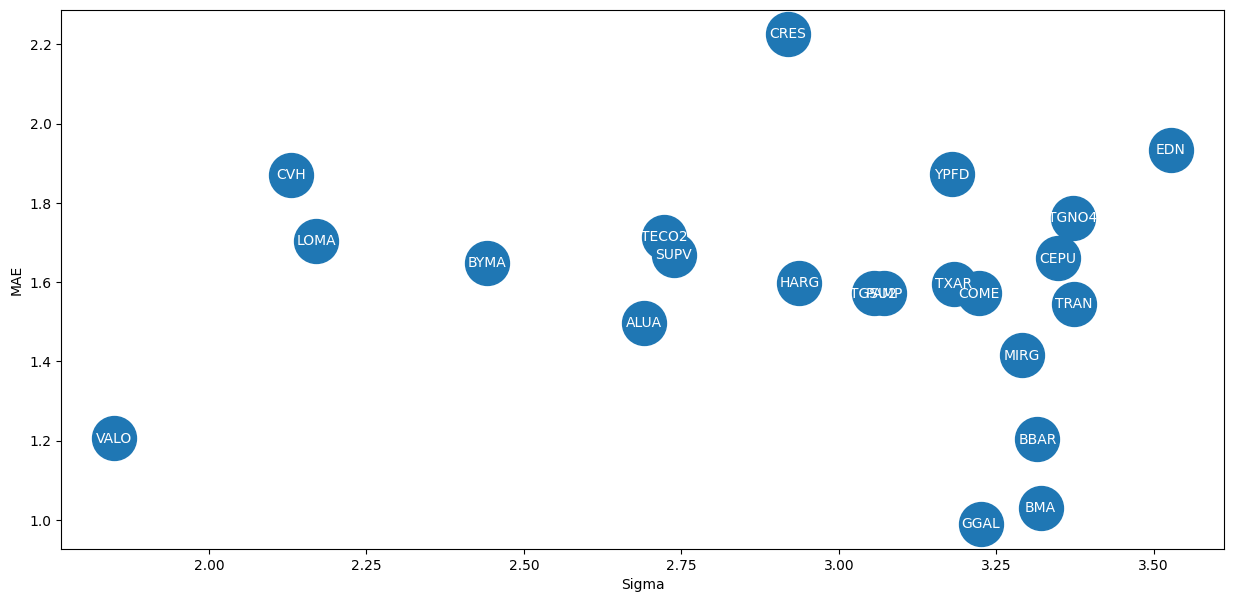

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))

scatter = ax.scatter(df.sigma, df.mae, s=1000)
for i, ticker in enumerate(df.index):
    y = df.mae.iloc[i]
    x = df.sigma.iloc[i]
    ax.text(x, y, ticker, fontsize=10, color='white', ha='center', va='center')

ax.set_ylabel('MAE')
ax.set_xlabel('Sigma')
plt.show()

In [ ]:
(df.sigma - df.mae).sort_values(ascending=False).head(10)

ticker
BMA      2.290285
GGAL     2.237296
BBAR     2.112823
MIRG     1.875632
TRAN     1.828546
CEPU     1.688197
COME     1.651046
TGNO4    1.610037
EDN      1.594232
TXAR     1.588162
dtype: float64